In [1]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Fancier plots

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=13)
#

ModuleNotFoundError: No module named 'seaborn'

(array([3., 0., 2., 4., 1., 0., 3., 3., 2., 2.]),
 array([0.00941277, 0.1057316 , 0.20205044, 0.29836927, 0.39468811,
        0.49100694, 0.58732578, 0.68364461, 0.77996345, 0.87628228,
        0.97260111]),
 <BarContainer object of 10 artists>)

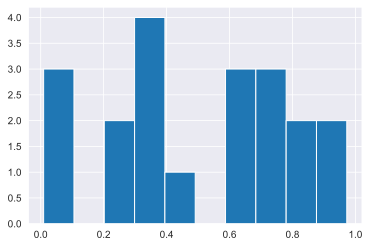

In [64]:
x = np.random.uniform(0, 1, 20)
plt.hist(x)

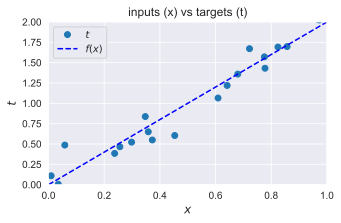

In [65]:
def f(x):
      return x * 2

noise = np.random.randn(x.shape[0])
noise_variance = 0.2
# Generating noise
noise = np.random.randn(x.shape[0]) * noise_variance
t = f(x) + noise
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('inputs (x) vs targets (t)')
plt.legend(loc=2)
plt.show()

In [66]:
def my_nn_model(x,w):
    return x * w

def error_function(y, t):
    return np.mean((t-y)**2)


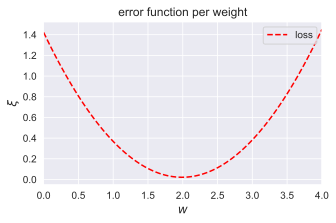

In [67]:
plt.figure(figsize=(5, 3))
weights = np.linspace(0, 4, num=100)
errors_per_weight = np.vectorize(lambda w: 
    error_function(my_nn_model(x, w), t)
)(weights)
plt.plot(weights, errors_per_weight, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('error function per weight')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()

In [72]:
w = np.random.rand()
learning_rate = 0.9

def delta_weight(w, x, t, learning_rate):
    return learning_rate * 2 * np.mean(x * (my_nn_model(x, w) - t))

losses = [(w, error_function(my_nn_model(x, w), t))]

iterations = 40
for i in range(iterations):
    deltaWeight = delta_weight(w, x, t, learning_rate)
    print(f'{deltaWeight:0.14f}')
    w = w - deltaWeight
    losses.append((w, error_function(my_nn_model(x, w), t)))

for i in range(0, len(losses)):
    print(f'w({i}): {losses[i][0]:.4f} \t loss: {losses[i][1]:.4f}')

-0.65637892490816
-0.23844448818610
-0.08662035264811
-0.03146680197961
-0.01143102742662
-0.00415257922025
-0.00150851831046
-0.00054800339074
-0.00019907462453
-0.00007231835934
-0.00002627127948
-0.00000954363638
-0.00000346694174
-0.00000125944499
-0.00000045752187
-0.00000016620517
-0.00000006037779
-0.00000002193360
-0.00000000796787
-0.00000000289451
-0.00000000105150
-0.00000000038198
-0.00000000013876
-0.00000000005041
-0.00000000001831
-0.00000000000665
-0.00000000000242
-0.00000000000088
-0.00000000000032
-0.00000000000012
-0.00000000000004
-0.00000000000002
-0.00000000000001
-0.00000000000000
-0.00000000000000
-0.00000000000000
-0.00000000000000
-0.00000000000000
-0.00000000000000
-0.00000000000000
w(0): 0.9589 	 loss: 0.3976
w(1): 1.6153 	 loss: 0.0713
w(2): 1.8538 	 loss: 0.0282
w(3): 1.9404 	 loss: 0.0225
w(4): 1.9718 	 loss: 0.0218
w(5): 1.9833 	 loss: 0.0217
w(6): 1.9874 	 loss: 0.0217
w(7): 1.9889 	 loss: 0.0217
w(8): 1.9895 	 loss: 0.0217
w(9): 1.9897 	 loss: 0.0217


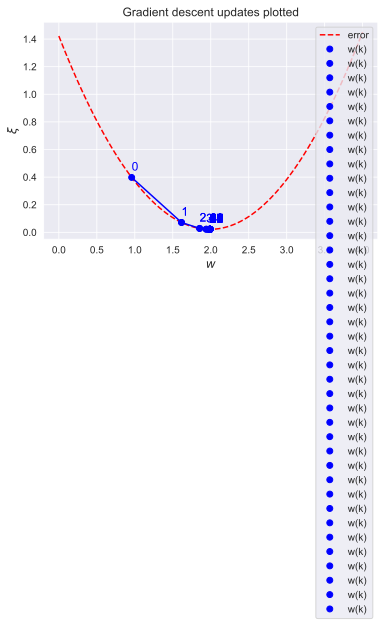

In [73]:
plt.figure(figsize=(6, 4))
plt.plot(weights, errors_per_weight, 'r--', label='error')
for i in range(0, len(losses)-1):
    w1, c1 = losses[i]
    w2, c2 = losses[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2], [c1, c2], 'b-')
    plt.text(w1, c1 + 0.05, i, fontsize=12, color='b')
    plt.text(w2, c2 + 0.05, i + 1, fontsize=12, color='b')

    plt.xlabel('$w$', fontsize=12)
    plt.ylabel('$\\xi$', fontsize=12)
plt.plot(w2, c2, 'bo', label='w(k)')

plt.title('Gradient descent updates plotted')
plt.legend(loc=1)